# We will construct a linear regression model which ***explains the relationship between car mileage (mpg (miles per gallon) column in our dataset) and other attributes (columns).*** We are using regression model in 'auto-mpg' dataset because Dependent Variable i.e., mpg has multiple numerical values.

### *All the theory work done in MS-Word file named "(Session-7) Machine Learning-THEORY_PART".*

In [ ]:
# I have imported my theory file in this notebook through google drive.
#theory_file=pd.read_word('/content/drive/MyDrive/(Session-7) Machine Learning-THEORY_PART.docx')

In [ ]:
# step 1 : Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# pd.set_option('display.max_rows', None) # this will show all rows of dataset
# pd.set_option('display.max_columns', None) # this will show all columns of dataset
# we will split our data into train data and test data.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
# step 2 : Load the dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Datasets-main/auto-mpg.csv')
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
102,26.0,4,97.0,46,1950,21.0,73,2,volkswagen super beetle
319,31.3,4,120.0,75,2542,17.5,80,3,mazda 626
93,14.0,8,318.0,150,4237,14.5,73,1,plymouth fury gran sedan
192,22.0,6,250.0,105,3353,14.5,76,1,chevrolet nova
76,18.0,4,121.0,112,2933,14.5,72,2,volvo 145e (sw)
334,23.7,3,70.0,100,2420,12.5,80,3,mazda rx-7 gs
56,26.0,4,91.0,70,1955,20.5,71,1,plymouth cricket
337,32.4,4,107.0,72,2290,17.0,80,3,honda accord
53,31.0,4,71.0,65,1773,19.0,71,3,toyota corolla 1200
45,18.0,6,258.0,110,2962,13.5,71,1,amc hornet sportabout (sw)


In [ ]:
df.shape

(398, 9)

In [ ]:
df.drop('car name', axis=1,inplace=True)
# we dropped 'car name' column because it is not required.
df.sample(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
209,19.0,4,120.0,88,3270,21.9,76,2
59,23.0,4,97.0,54,2254,23.5,72,2


In [ ]:
# step 3 : replacing the categorical data with actual values

In [ ]:
df['origin']=df['origin'].replace({1:'America',2:'Europe',3:'Asia'})
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
53,31.0,4,71.0,65,1773,19.0,71,Asia
254,20.2,6,200.0,85,2965,15.8,78,America
225,17.5,6,250.0,110,3520,16.4,77,America
278,31.5,4,89.0,71,1990,14.9,78,Europe
151,31.0,4,79.0,67,2000,16.0,74,Europe
329,44.6,4,91.0,67,1850,13.8,80,Asia
67,11.0,8,429.0,208,4633,11.0,72,America
69,12.0,8,350.0,160,4456,13.5,72,America
224,15.0,8,302.0,130,4295,14.9,77,America
351,34.4,4,98.0,65,2045,16.2,81,America


In [ ]:
# step 4 : create separate dummy columns of 'origin' column i.e., origin_asia, origin_america and origin_europe

In [ ]:
# one hot encoding is a step for creating separate dummy columns of 'origin' column i.e., origin_asia, origin_america and origin_europe
# ismein esa hota hai ---> agar origin_america mein koi car bani hai to uske column mein '1' aayega aur
# baki columns i.e., origin_asia aur origin_europe ke coulmns mein '0' aayega.
# jese hum niche table mein dekh skte hain.
# ye hi 'one hot encoding' hoti hai.
df=pd.get_dummies(df,columns=['origin'])
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_America,origin_Asia,origin_Europe
155,15.0,6,250.0,72,3158,19.5,75,1,0,0
294,34.1,4,86.0,65,1975,15.2,79,0,1,0
289,16.9,8,350.0,155,4360,14.9,79,1,0,0
170,23.0,4,140.0,78,2592,18.5,75,1,0,0
103,11.0,8,400.0,150,4997,14.0,73,1,0,0
98,16.0,6,250.0,100,3278,18.0,73,1,0,0
366,17.6,6,225.0,85,3465,16.6,81,1,0,0
5,15.0,8,429.0,198,4341,10.0,70,1,0,0
266,30.0,4,98.0,68,2155,16.5,78,1,0,0
259,20.8,6,200.0,85,3070,16.7,78,1,0,0


In [ ]:
# ye code isliye likha hai kyonki horsepower waley column mein kuchh hidden missing values hain jo '?' ke sign mein show ho rhi hain.
# unko hi handle krne ke liiye esa kr rhey hain.
df['horsepower']=df['horsepower'].replace('?', np.nan)
df['horsepower']=df['horsepower'].astype(float)

In [ ]:
median1=df['horsepower'].median()
median1

93.5

In [ ]:
df['horsepower'].replace(np.nan,median1,inplace=True)

In [ ]:
df.dtypes
# now 'horsepower' datatype is changed to 'float64' from 'object-type'

mpg               float64
cylinders           int64
displacement      float64
horsepower        float64
weight              int64
acceleration      float64
model year          int64
origin_America      uint8
origin_Asia         uint8
origin_Europe       uint8
dtype: object

In [ ]:
# isse ye ho rha hai ki hum apne dataset mein duplicate values ko check kr rhey hain.
duplicate=df.duplicated()
duplicate.sum()

0

There are various ways to handle missing values. Drop the rows, replace the missing values with median values etc. But in this dataset, out of 398 rows, 6 rows have missing values i.e., NaN values in only 'horsepower' column. We could drop all the 6 rows which might not a very good decision in any condition.

# BiVariative Plots
A bivariative analysis among the different variables can be used done using scattter matrix plot, Seaborn libs create a dashboard reflecting useful information about the dimensions. The results can be stored as in '.png' file.

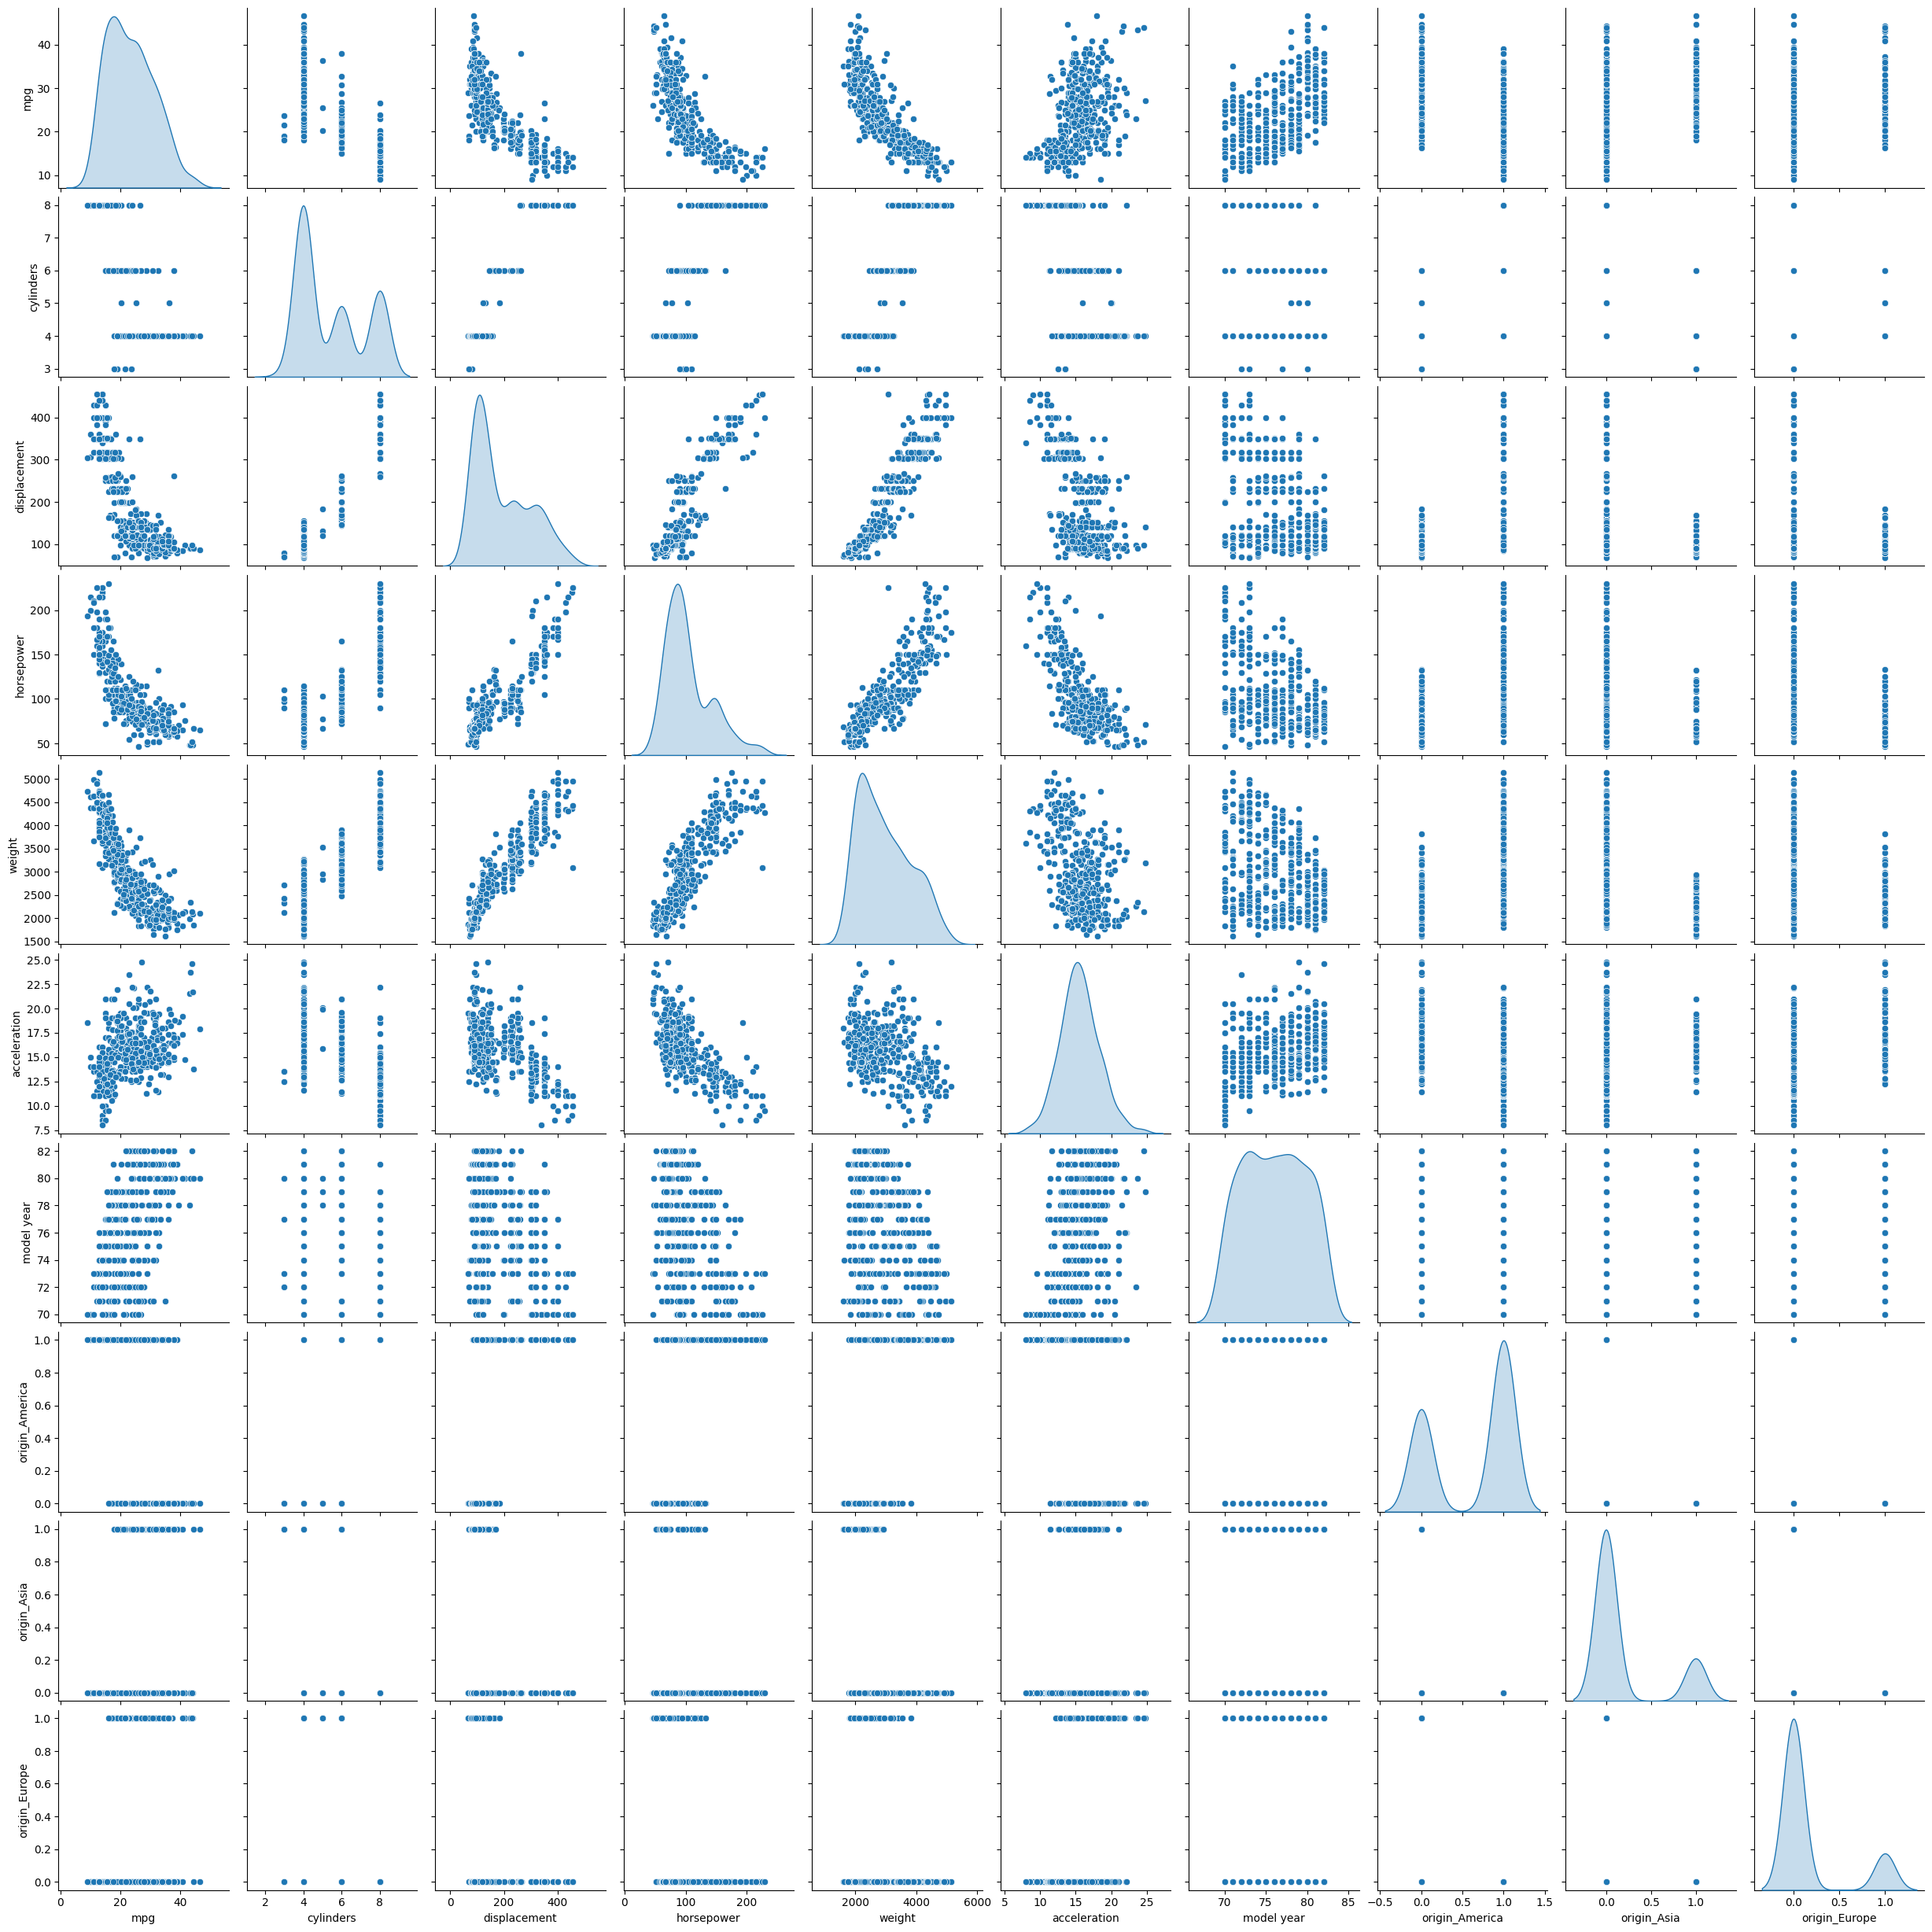

In [ ]:
sns.pairplot(df,diag_kind='kde')
# to study the co-relation between the attributes, we create a pairplot.

# before splitting data into train data and test data :
# we need to check whether our data has only 'int64', 'float64' and 'uint' types.
# also check whether there is any missing value or not.

In [ ]:
print('below are the datatypes of all the columns in our dataset.')
print('------------------------------------------------------------')
print(df.dtypes)
print()
print('below is showing how many missing values in any column in our dataset.')
print('------------------------------------------------------------')
print(df.isnull().sum())

below are the datatypes of all the columns in our dataset.
------------------------------------------------------------
mpg               float64
cylinders           int64
displacement      float64
horsepower        float64
weight              int64
acceleration      float64
model year          int64
origin_America      uint8
origin_Asia         uint8
origin_Europe       uint8
dtype: object

below is showing how many missing values in any column in our dataset.
------------------------------------------------------------
mpg               0
cylinders         0
displacement      0
horsepower        0
weight            0
acceleration      0
model year        0
origin_America    0
origin_Asia       0
origin_Europe     0
dtype: int64


# Split data

In [ ]:
# lets build our model
# uske liye hamein dependent aur independent variables chahiye honge.
# dependent variable -----------------
y=df[['mpg']]
# independent variables --------------
X=df.drop(['mpg'],axis=1)
# x variable mein 'mpg' ko isliye drop kara hai kyonki use chhodkar baki sabhi IDVs hain.

In [ ]:
# splitting x and y into training and testing data respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)
# test_size = 0.30 means 30% data se hum model ko test karenge aur baki 0.70 means 70% data se model ko tran karenge.

# Fit the Linear Regression model
means we are taining our model by giving 70% of data.

In [ ]:
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

* Here are the coefficients for each variable (X and y) and intercept
* The score (R^2) for in-sample and out-of-sample

In [ ]:
# here we are checking the score of model after training
model_1.score(X_train, y_train)

0.8215521225570098

In [ ]:
# here we are checking the score of model after testing.
model_1.score(X_test, y_test)
# iska score 0.7 se jada hai iska matlab hai hamara model good hai.

0.8226939742691544